# Introduction and Framing
LA is part of an open data project that shares some city agency data with the public. One of the data sets that is available are the 311 calls to the city. One of the more common service requests invovle complaints about Homeless Encampments.

By looking at calls about these encampments it should be possible to analyze or predict a few things:

1. how quickly the requests are handled (e.g. based on location/assignment)
2. where encampments are likely to be found next
3. how many new encampments are appearing or likely to appear

#### Data information

https://data.lacity.org/A-Well-Run-City/MyLA311-Service-Request-Data-2019/pvft-t768

The data is stored in Socrata, which offers an API for filtering and sorting data
https://dev.socrata.com/docs/filtering.html

#### More background

Calls to 311 are not comprehensive records of the locations or homeless encampments but they are being used to marshall city resources for cleanups per LA Times reporting:

https://www.latimes.com/local/lanow/la-me-ln-homeless-cleanups-accelerate-20190607-htmlstory.html

Cleanup notifications need to be posted 24-72 hours in advance.

#### Other ideas

Bring in some other data sources:

* some indicator of wealth by zipcode or neighborhood (http://www.laalmanac.com/employment/em12c.php)

# Download LA 311 Call Data (Optional)

Start by retrieving all 311 call data in LA related to Homeless Encampments as a JSON file for each year. **This should only need to be run infrequently.**

In [0]:
import json
import urllib.request
import ssl
from google.colab import drive

year_json = {
    2015: 'ms7h-a45h',
    2016: 'ndkd-k878',
    2017: 'd4vt-q4t5',
    2018: 'h65r-yf5i',
    2019: 'pvft-t768'
}

In [0]:
# download the JSON data
api_endpoint = 'https://data.lacity.org/resource/ms7h-a45h.json?$limit=50000&requesttype=Homeless%20Encampment&$order=srnumber%20DESC'

with urllib.request.urlopen(api_endpoint, context=ssl._create_unverified_context()) as url:
    data = json.loads(url.read().decode())

# write the file to disk for later
source_file = 'drive/My Drive/Colab Notebooks/data/la_homeless_data_2015.json'

drive.mount('/content/drive/')

with open(source_file, 'w') as json_file:
    json.dump(data, json_file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# download the JSON data
api_endpoint = 'https://data.lacity.org/resource/ndkd-k878.json?$limit=50000&requesttype=Homeless%20Encampment&$order=srnumber%20DESC'

with urllib.request.urlopen(api_endpoint, context=ssl._create_unverified_context()) as url:
    data = json.loads(url.read().decode())

# write the file to disk for later
source_file = 'drive/My Drive/Colab Notebooks/data/la_homeless_data_2016.json'

drive.mount('/content/drive/')

with open(source_file, 'w') as json_file:
    json.dump(data, json_file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# download the JSON data
api_endpoint = 'https://data.lacity.org/resource/d4vt-q4t5.json?$limit=50000&requesttype=Homeless%20Encampment&$order=srnumber%20DESC'

with urllib.request.urlopen(api_endpoint, context=ssl._create_unverified_context()) as url:
    data = json.loads(url.read().decode())

# write the file to disk for later
source_file = 'drive/My Drive/Colab Notebooks/data/la_homeless_data_2017.json'

drive.mount('/content/drive/')

with open(source_file, 'w') as json_file:
    json.dump(data, json_file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# download the JSON data
api_endpoint = 'https://data.lacity.org/resource/h65r-yf5i.json?$limit=50000&requesttype=Homeless%20Encampment&$order=srnumber%20DESC'

with urllib.request.urlopen(api_endpoint, context=ssl._create_unverified_context()) as url:
    data = json.loads(url.read().decode())

# write the file to disk for later
source_file = 'drive/My Drive/Colab Notebooks/data/la_homeless_data_2018.json'

drive.mount('/content/drive/')

with open(source_file, 'w') as json_file:
    json.dump(data, json_file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
# download the JSON data
api_endpoint = 'https://data.lacity.org/resource/pvft-t768.json?$limit=50000&requesttype=Homeless%20Encampment&$order=srnumber%20DESC'

with urllib.request.urlopen(api_endpoint, context=ssl._create_unverified_context()) as url:
    data = json.loads(url.read().decode())

# write the file to disk for later
source_file = 'drive/My Drive/Colab Notebooks/data/la_homeless_data_2019.json'

drive.mount('/content/drive/')

with open(source_file, 'w') as json_file:
    json.dump(data, json_file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from fbprophet import Prophet

%matplotlib inline

# Load and prepare data

Next we will import 4 years of data into Pandas and trim and clean it for use

In [67]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

years = ['2016', '2017', '2018', '2019']
source_file_root = 'drive/My Drive/Colab Notebooks/data/la_homeless_data_'

li = []

for y in years:
    df = pd.read_json(source_file_root + y + '.json')
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True, sort=False)
df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,location,zipcode,srnumber,updateddate,closeddate,cd,address,createddate,requestsource,requesttype,assignto,latitude,owner,approximateaddress,policeprecinct,cdmember,servicedate,nc,longitude,tbmcolumn,status,tbmrow,anonymous,addressverified,actiontaken,ncname,apc,tbmpage,suffix,housenumber,direction,streetname,mobileos,createdbyuserorganization
0,"{'latitude': '34.105039435', 'needs_recoding':...",90068,1-99958971,2016-06-17T13:15:16.000,2016-06-17T13:15:16.000,13.0,"HIGHLAND AVE AT FRANKLIN AVE, 90068",2016-01-19T11:05:07.000,Call,Homeless Encampment,NC,34.105039,BOS,N,HOLLYWOOD,Mitch O'Farrell,2016-06-17T00:00:00.000,29.0,-118.337517,E,Closed,4.0,Y,Y,SR Created,HOLLYWOOD HILLS WEST NC,Central APC,593.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'latitude': '34.0433588821', 'needs_recoding'...",90025,1-99803101,2016-01-19T12:30:23.000,2016-01-19T12:30:23.000,11.0,"1845 S BELOIT AVE, 90025",2016-01-19T09:52:39.000,Call,Homeless Encampment,"213, IED",34.043359,BSS,N,WEST LOS ANGELES,Mike Bonin,2016-01-19T12:29:00.000,66.0,-118.444496,B,Closed,5.0,Y,Y,SR Created,WEST LOS ANGELES NC,West Los Angeles APC,632.0,AVE,1845.0,S,BELOIT,NaN,NaN
2,"{'latitude': '34.2282312114', 'needs_recoding'...",91343,1-99778571,2016-01-27T09:47:05.000,2016-01-27T09:47:05.000,6.0,"15482 W PARTHENIA ST, 91343",2016-01-19T09:42:43.000,Self Service,Homeless Encampment,"220, IED",34.228231,BSS,N,MISSION,Nury Martinez,2016-01-26T17:56:00.000,112.0,-118.469162,G,Closed,1.0,N,Y,SR Created,NORTH HILLS EAST,North Valley APC,531.0,ST,15482.0,W,PARTHENIA,NaN,NaN
3,"{'latitude': '34.0706894105', 'needs_recoding'...",90026,1-99704461,2016-01-21T13:47:21.000,2016-01-21T13:47:21.000,13.0,"1900 W ROSS-LOOS PL, 90026",2016-01-19T09:05:09.000,Call,Homeless Encampment,"104, IED",34.070689,BSS,N,RAMPART,Mitch O'Farrell,2016-01-21T13:47:00.000,44.0,-118.265063,D,Closed,1.0,Y,Y,SR Created,GREATER ECHO PARK ELYSIAN NC,East Los Angeles APC,634.0,PL,1900.0,W,ROSS-LOOS,NaN,NaN
4,"{'latitude': '33.9520273344', 'needs_recoding'...",90003,1-99702771,2016-06-17T11:05:54.000,2016-06-17T11:05:54.000,9.0,"231 E 93RD ST, 90003",2016-01-19T09:05:34.000,Call,Homeless Encampment,SLA,33.952027,BOS,N,SOUTHEAST,Curren D. Price Jr.,2016-06-17T00:00:00.000,87.0,-118.270690,D,Closed,3.0,N,Y,SR Created,EMPOWERMENT CONGRESS SOUTHEAST AREA NDC,South Los Angeles APC,704.0,ST,231.0,E,93RD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129137,"{'latitude': '34.0640188851', 'needs_recoding'...",90048,1-1262701121,2019-01-31T10:03:47.000,2019-01-31T09:34:43.000,5.0,"6419 W WILSHIRE BLVD, 90048",2019-01-01T04:00:18.000,Mobile App,Homeless Encampment,WLA,34.064019,BOS,NaN,WILSHIRE,Paul Koretz,2019-01-07T00:00:00.000,58.0,-118.369024,A,Closed,2.0,Y,Y,SR Created,MID CITY WEST CC,Central APC,633.0,BLVD,6419.0,W,WILSHIRE,Android,Self Service
129138,"{'latitude': '34.1755560314', 'needs_recoding'...",91367,1-1262698561,2019-01-05T08:23:33.000,2019-01-05T08:23:33.000,3.0,"MIRANDA ST AT SHOUP AVE, 91367",2019-01-01T07:04:42.000,Mobile App,Homeless Encampment,WV,34.175556,BOS,NaN,TOPANGA,Bob Blumenfield,2019-01-05T00:00:00.000,16.0,-118.614636,J,Closed,1.0,N,Y,SR Created,WOODLAND HILLS-WARNER CENTER NC,South Valley APC,559.0,NaN,NaN,NaN,NaN,iOS,Self Service
129139,"{'latitude': '34.0009987155', 'needs_recoding'...",90291,1-1262697781,2019-03-13T18:13:51.000,2019-03-13T12:47:32.000,11.0,"233 S 7TH AVE, 90291",2019-01-01T06:54:25.000,Mobile App,Homeless Encampment,WLA,34.000999,BOS,NaN,PACIFIC,Mike Bonin,2019-01-09T00:00:00.000,68.0,-118.470647,H,Closed,4.0,N,Y,SR Created,VENICE NC,West Los Angeles APC,671.0,AVE,233.0,S,7TH,iOS,Self Service
129140,"{'latitude': '33.7892776822', 'needs_recoding'...",90710,1-1262697189,2019-01-08T14:25:43.000,2019-01-08T14:21:14.000,15.0,"1290 W PACIFIC COAST HWY, 90710",2019-01-01T01:05:42.000,Mobile App,Homeless Encampment,HB,33.789278,BOS,NaN,HARBOR,Joe Buscaino,2019-01-08T00:00:00.000,92.0,-118

In [68]:
trim_cols = ['srnumber', # id for service request
            'createddate', 
            'updateddate', 
            'status', # ['Open', 'Pending', 'Closed', 'Cancelled']
            'assignto', # ['WV', 'WLA', 'EV', 'NC', 'SLA', 'HB', '', nan]
            'actiontaken', # 'SR Created', 'SR Updated', 'Escalate to Supervisor','Transferred', 'Status Provided']
            'servicedate', 
            'closeddate', 
            'zipcode', 
            'latitude', 
            'longitude', 
            'apc', 
            'nc', # neighborhood council ID
            'ncname' # neighborhood council name
            ]

# remove unneeded columns
df = df[trim_cols]

# set up date datatypes
df['createddate'] = pd.to_datetime(df['createddate'])
df['updateddate'] = pd.to_datetime(df['updateddate'])
df['servicedate'] = pd.to_datetime(df['servicedate'])
df['closeddate'] = pd.to_datetime(df['closeddate'])

df.sort_values('createddate', inplace=True)
df.reset_index(inplace=True)
df.info()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129142 entries, 0 to 129141
Data columns (total 15 columns):
index          129142 non-null int64
srnumber       129142 non-null object
createddate    129142 non-null datetime64[ns]
updateddate    129142 non-null datetime64[ns]
status         129142 non-null object
assignto       128521 non-null object
actiontaken    129142 non-null object
servicedate    128456 non-null datetime64[ns]
closeddate     121401 non-null datetime64[ns]
zipcode        129061 non-null object
latitude       129099 non-null float64
longitude      129099 non-null float64
apc            129102 non-null object
nc             127906 non-null float64
ncname         128180 non-null object
dtypes: datetime64[ns](4), float64(3), int64(1), object(7)
memory usage: 14.8+ MB


In [69]:

# get dummies instead!!
# geo pandas
# factorize new status and assignto columns
df['statusf'] = pd.factorize(df['status'])[0]
df['assigntof'] = pd.factorize(df['assignto'])[0]

# change zipcode datatype to int
df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')

df['is_closed'] = df['closeddate'].notnull().astype(int)

# calculate the hours before the request was closed
df['hourstoclose'] = (df['closeddate'] - df['createddate']) / pd.Timedelta(hours=1)

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

,index,srnumber,createddate,updateddate,status,assignto,actiontaken,servicedate,closeddate,zipcode,latitude,longitude,apc,nc,ncname,statusf,assigntof,is_closed,hourstoclose
0,251,1-88277111,2016-01-01 11:59:22,2016-01-05 07:31:46,Closed,"219, IED",SR Created,2016-01-05 07:31:00,2016-01-05 07:31:46,91345.0,34.264524,-118.471658,North Valley APC,101.0,MISSION HILLS NC,0,0,1,91.540000
1,250,1-88412861,2016-01-02 10:01:50,2016-01-27 07:48:23,Closed,"107, IED",SR Created,NaT,2016-01-27 07:48:23,90027.0,34.101218,-118.291811,Central APC,36.0,LOS FELIZ NC,0,1,1,597.775833
2,249,1-88498251,2016-01-02 13:29:53,2016-03-29 09:53:12,Closed,"102, IED",SR Created,2016-03-29 09:52:00,2016-03-29 09:53:12,90003.0,33.952787,-118.279836,South Los Angeles APC,87.0,EMPOWERMENT CONGRESS SOUTHEAST AREA NDC,0,2,1,2084.388611
3,248,1-88594161,2016-01-03 08:56:57,2016-03-30 16:57:14,Closed,"104, IED",SR Created,2016-03-30 16:56:00,2016-03-30 16:57:14,90057.0,34.066573,-118.270664,Central APC,97.0,WESTLAKE NORTH NC,0,3,1,2096.004722
4,247,1-88628731,2016-01-03 11:03:11,2016-01-04 18:49:15,Closed,"109, IED",SR Created,2016-01-04 18:48:00,2016-01-04 18:49:15,90006.0,34.048300,-118.292824,Central APC,76.0,PICO UNION NC,0,4,1,31.767778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129137,80299,1-1494228858,2019-11-15 21:35:48,2019-11-15 21:35:49,Open,WV,SR Created,2019-11-21 00:00:00,NaT,91356.0,34.172118,-118.535251,South Valley APC,17.0,TARZANA NC,4,29,0,NaN
129138,80298,1-1494229353,2019-11-15 21:48:37,2019-11-15 21:48:38,Open,EV,SR Created,2019-11-19 00:00:00,NaT,91601.0,34.176056,-118.381645,South Valley APC,24.0,NOHO NC,4,28,0,NaN
129139,80295,1-1494236516,2019-11-15 21:59:24,2019-11-15 21:59:26,Open,NC,SR Created,2019-11-22 00:00:00,NaT,90028.0,34.102626,-118.318234,Central APC,30.0,HOLLYWOOD UNITED NC,4,7,0,NaN
129140,80297,1-1494232291,2019-11-15 22:07:21,2019-11-15 22:07:21,Open,WLA,SR Created,2019-11-18 00:00:00,NaT,90291.0,33.984691,-118.469307,West Los Angeles APC,68.0,VENICE NC,4,18,0,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129142 entries, 0 to 129141
Data columns (total 19 columns):
index           129142 non-null int64
srnumber        129142 non-null object
createddate     129142 non-null datetime64[ns]
updateddate     129142 non-null datetime64[ns]
status          129142 non-null object
assignto        128521 non-null object
actiontaken     129142 non-null object
servicedate     128456 non-null datetime64[ns]
closeddate      121401 non-null datetime64[ns]
zipcode         129053 non-null float64
latitude        129099 non-null float64
longitude       129099 non-null float64
apc             129102 non-null object
nc              127906 non-null float64
ncname          128180 non-null object
statusf         129142 non-null int64
assigntof       129142 non-null int64
is_closed       129142 non-null int64
hourstoclose    121401 non-null float64
dtypes: datetime64[ns](4), float64(5), int64(4), object(6)
memory usage: 18.7+ MB


# Profiling Analysis

Next we will do some analysis on the data using pandas profiling

In [0]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,18
Number of observations,129142
Total Missing (%),0.8%
Total size in memory,17.7 MiB
Average record size in memory,144.0 B
Numeric,8
Categorical,4
Boolean,1
Date,4
Text (Unique),1
Rejected,0


# Other Exploratory Analysis

Next we will do some exploratory analysis on the data

In [0]:
# most recent event date, shape and sample
print(df.createddate.max())
print(df.shape)
df

2019-11-15 22:28:29
(129142, 18)


,index,srnumber,createddate,updateddate,status,assignto,actiontaken,servicedate,closeddate,zipcode,latitude,longitude,nc,ncname,statusf,assigntof,is_closed,hourstoclose
0,251,1-88277111,2016-01-01 11:59:22,2016-01-05 07:31:46,Closed,"219, IED",SR Created,2016-01-05 07:31:00,2016-01-05 07:31:46,91345.0,34.264524,-118.471658,101.0,MISSION HILLS NC,0,0,1,91.540000
1,250,1-88412861,2016-01-02 10:01:50,2016-01-27 07:48:23,Closed,"107, IED",SR Created,NaT,2016-01-27 07:48:23,90027.0,34.101218,-118.291811,36.0,LOS FELIZ NC,0,1,1,597.775833
2,249,1-88498251,2016-01-02 13:29:53,2016-03-29 09:53:12,Closed,"102, IED",SR Created,2016-03-29 09:52:00,2016-03-29 09:53:12,90003.0,33.952787,-118.279836,87.0,EMPOWERMENT CONGRESS SOUTHEAST AREA NDC,0,2,1,2084.388611
3,248,1-88594161,2016-01-03 08:56:57,2016-03-30 16:57:14,Closed,"104, IED",SR Created,2016-03-30 16:56:00,2016-03-30 16:57:14,90057.0,34.066573,-118.270664,97.0,WESTLAKE NORTH NC,0,3,1,2096.004722
4,247,1-88628731,2016-01-03 11:03:11,2016-01-04 18:49:15,Closed,"109, IED",SR Created,2016-01-04 18:48:00,2016-01-04 18:49:15,90006.0,34.048300,-118.292824,76.0,PICO UNION NC,0,4,1,31.767778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129137,80299,1-1494228858,2019-11-15 21:35:48,2019-11-15 21:35:49,Open,WV,SR Created,2019-11-21 00:00:00,NaT,91356.0,34.172118,-118.535251,17.0,TARZANA NC,4,29,0,NaN
129138,80298,1-1494229353,2019-11-15 21:48:37,2019-11-15 21:48:38,Open,EV,SR Created,2019-11-19 00:00:00,NaT,91601.0,34.176056,-118.381645,24.0,NOHO NC,4,28,0,NaN
129139,80295,1-1494236516,2019-11-15 21:59:24,2019-11-15 21:59:26,Open,NC,SR Created,2019-11-22 00:00:00,NaT,90028.0,34.102626,-118.318234,30.0,HOLLYWOOD UNITED NC,4,7,0,NaN
129140,80297,1-1494232291,2019-11-15 22:07:21,2019-11-15 22:07:21,Open,WLA,SR Created,2019-11-18 00:00:00,NaT,90291.0,33.984691,-118.469307,68.0,VENICE NC,4,18,0,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129142 entries, 0 to 129141
Data columns (total 18 columns):
index           129142 non-null int64
srnumber        129142 non-null object
createddate     129142 non-null datetime64[ns]
updateddate     129142 non-null datetime64[ns]
status          129142 non-null object
assignto        128521 non-null object
actiontaken     129142 non-null object
servicedate     128456 non-null datetime64[ns]
closeddate      121401 non-null datetime64[ns]
zipcode         129053 non-null float64
latitude        129099 non-null float64
longitude       129099 non-null float64
nc              127906 non-null float64
ncname          128180 non-null object
statusf         129142 non-null int64
assigntof       129142 non-null int64
is_closed       129142 non-null int64
hourstoclose    121401 non-null float64
dtypes: datetime64[ns](4), float64(5), int64(4), object(5)
memory usage: 17.7+ MB


In [0]:
print(df.latitude.min(), df.latitude.max(), df.longitude.min(), df.longitude.max())

33.7063317096 34.3273804012 -118.664394587 -118.157098602


In [0]:
df.status.value_counts()

Closed          120831
Pending           6910
Open               831
Cancelled          558
Referred Out        12
Name: status, dtype: int64

In [0]:
df.nc.value_counts()

52.0     9078
55.0     6142
68.0     4561
20.0     4461
53.0     4367
         ... 
114.0      51
126.0      22
117.0       4
2.0         1
122.0       1
Name: nc, Length: 103, dtype: int64

In [0]:
df.zipcode.value_counts()

90021.0    4344
90004.0    4342
90291.0    4166
90020.0    3796
90026.0    3367
           ... 
90745.0       1
90301.0       1
90211.0       1
90095.0       1
91801.0       1
Name: zipcode, Length: 135, dtype: int64

In [0]:
df.shape

(129142, 18)

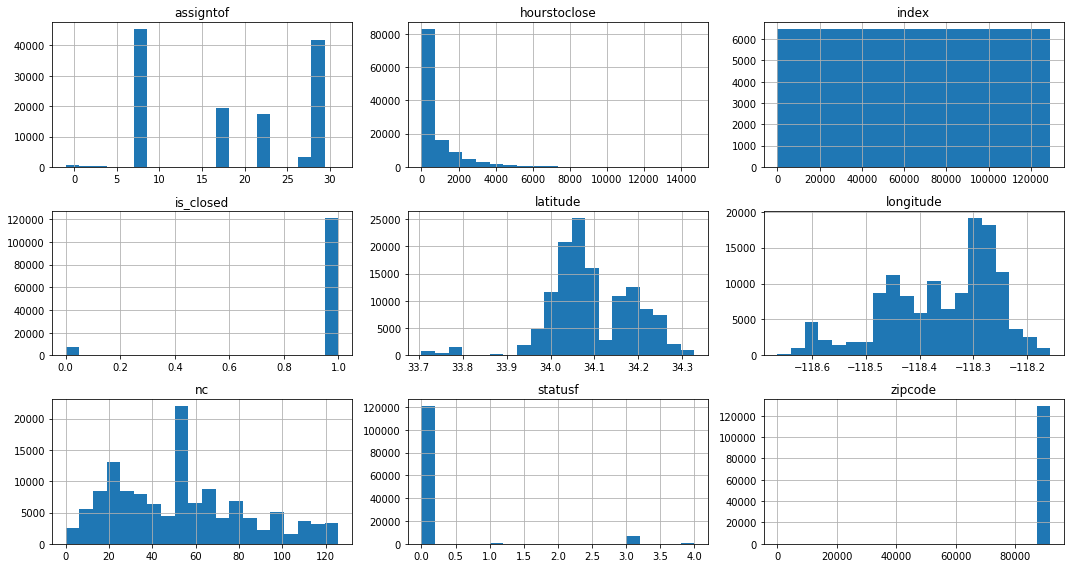

In [0]:
df.hist(bins=20, figsize=(15,8));
plt.tight_layout() # magic to make layout readable

In [0]:
df.assignto.value_counts()

NC          45078
EV          27438
WLA         19461
SLA         17493
WV          14416
HB           3154
220, IED      221
104, IED      178
107, IED      163
112, IED       85
108, IED       82
217, IED       68
101, IED       67
103, IED       63
110, IED       62
109, IED       55
221, IED       53
105, IED       50
218, IED       41
219, IED       40
102, IED       36
223, IED       31
106, IED       30
LSD            26
111, IED       26
215, IED       22
222, IED       17
214, IED       17
224, IED       16
213, IED       15
216, IED       13
                4
Name: assignto, dtype: int64

In [0]:
df.ncname.value_counts()

DOWNTOWN LOS ANGELES              9091
WILSHIRE CENTER - KOREATOWN NC    6142
VENICE NC                         4566
VAN NUYS NC                       4468
RAMPART VILLAGE NC                4370
                                  ... 
PORTER RANCH NC                     51
HERMON NC                           22
PACIFIC PALISADES NC                 4
HISTORIC FILIPINOTOWN NC             1
OLD NORTHRIDGE CC                    1
Name: ncname, Length: 107, dtype: int64

In [0]:
df.zipcode.value_counts()

90021.0    4344
90004.0    4342
90291.0    4166
90020.0    3796
90026.0    3367
           ... 
90745.0       1
90301.0       1
90211.0       1
90095.0       1
91801.0       1
Name: zipcode, Length: 135, dtype: int64

In [0]:
corr_data = df.corr()
corr_data

,index,zipcode,latitude,longitude,nc,statusf,assigntof,is_closed,hourstoclose
index,1.000000,0.028792,0.029231,-0.038780,-0.060433,0.181070,0.055400,-0.187873,-0.102463
zipcode,0.028792,1.000000,0.373734,-0.366919,-0.225886,-0.011861,0.410287,0.010787,-0.084526
latitude,0.029231,0.373734,1.000000,-0.537264,-0.492866,-0.007710,0.376397,0.006131,-0.107436
longitude,-0.038780,-0.366919,-0.537264,1.000000,0.213383,0.013498,-0.661976,-0.013041,0.164354
nc,-0.060433,-0.225886,-0.492866,0.213383,1.000000,0.001915,-0.110704,-0.000681,0.068705
statusf,0.181070,-0.011861,-0.007710,0.013498,0.001915,1.000000,-0.013240,-0.990535,0.009031
assigntof,0.055400,0.410287,0.376397,-0.661976,-0.110704,-0.013240,1.000000,0.004276,-0.088830
is_closed,-0.187873,0.010787,0.006131,-0.013041,-0.000681,-0.990535,0.004276,1.000000,NaN
hourstoclose,-0.102463,-0.084526,-0.107436,0.164354,0.068705,0.009031,-0.088830,NaN,1.000000


In [0]:
import seaborn as sns
sns.color_palette("coolwarm")
sns.heatmap(corr_data, vmax=1, vmin=-1, center=0, cmap='coolwarm')

In [0]:
feature_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df, x_vars=feature_cols, y_vars='hourstoclose', kind='reg');
plt.tight_layout() # magic to make layout readable

# (Home Price - Pop - Hours to Close) Correlation Analysis

Next we will do some analysis on how median home price impacts resolution time

## Create zipcode dataframe

First get the 2018 median home prices for single family residences in LA by zip code

http://www.laalmanac.com/economy/ec37b.php

Follow ups: check Zillow?

In [6]:
# create sub data frame to merge other data to
zip_df = df.groupby(by='zipcode').agg({'srnumber':'count', 'hourstoclose':'mean'})
zip_df.rename(columns={'srnumber':'call_count', 'hourstoclose':'mean_hrs_to_close'}, inplace=True)
zip_df.drop(0.0, inplace=True)
zip_df

,call_count,mean_hrs_to_close
zipcode,,
90001.0,365,1770.378365
90002.0,485,1307.058581
90003.0,2266,1536.880893
90004.0,4342,777.306583
90005.0,2604,841.307742
...,...,...
91605.0,2289,634.529480
91606.0,1798,671.793389
91607.0,791,604.177398


In [7]:
# LOAD: home price data
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

source_file = 'drive/My Drive/Colab Notebooks/data/la_home_prices.csv'

# read in the file and use 
house_df = pd.read_csv(source_file, usecols=[0, 1, 2])
house_df.columns = ['home_zipcode', 'zip_name', 'med_home_price']
house_df['med_home_price'] = house_df['med_home_price'].str.replace(',', '').str.replace('$', '').astype(float)
house_df.set_index('home_zipcode', inplace=True)
house_df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,zip_name,med_home_price
home_zipcode,,
90001,"Los Angeles(South Los Angeles),Florence-Graham",369300.0
90002,"Los Angeles(Southeast Los Angeles, Watts)",372600.0
90003,"Los Angeles(South Los Angeles, Southeast Los A...",379800.0
90004,"Los Angeles(Hancock Park, Rampart Village, Vir...",1590400.0
90005,"Los Angeles(Hancock Park, Koreatown, Wilshire ...",1721400.0
...,...,...
93544,"Crystalaire, Llano",271800.0
93550,"Lake Los Angeles,Palmdale",278000.0
93551,"City Ranch,Leona Valley,Palmdale",394800.0


In [8]:
# LOAD: population data
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

source_file = 'drive/My Drive/Colab Notebooks/data/la_pop_zip.csv'

# read in the file and use 
pop_df = pd.read_csv(source_file, usecols=[0, 2, 3])
pop_df.columns = ['zipcode', 'area_name', 'population']
pop_df.set_index('zipcode', inplace=True)
pop_df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,area_name,population
zipcode,,
90001,Los Angeles,57110
90002,Los Angeles,51223
90003,Los Angeles,66266
90004,Los Angeles,62180
90005,Los Angeles,37681
...,...,...
93551,Palmdale,50798
93552,Palmdale,38158
93553,Pearblossom,2138


In [9]:
# left join the data frames together using the indexes to match the source data zips
zip_df = zip_df.join(pop_df.population, how='left')
zip_df = zip_df.join(house_df[['med_home_price', 'zip_name']], how='left')
zip_df

,call_count,mean_hrs_to_close,population,med_home_price,zip_name
zipcode,,,,,
90001.0,365,1770.378365,57110.0,369300.0,"Los Angeles(South Los Angeles),Florence-Graham"
90002.0,485,1307.058581,51223.0,372600.0,"Los Angeles(Southeast Los Angeles, Watts)"
90003.0,2266,1536.880893,66266.0,379800.0,"Los Angeles(South Los Angeles, Southeast Los A..."
90004.0,4342,777.306583,62180.0,1590400.0,"Los Angeles(Hancock Park, Rampart Village, Vir..."
90005.0,2604,841.307742,37681.0,1721400.0,"Los Angeles(Hancock Park, Koreatown, Wilshire ..."
...,...,...,...,...,...
91605.0,2289,634.529480,56343.0,582100.0,Los Angeles(North Hollywood)
91606.0,1798,671.793389,44958.0,659700.0,"Los Angeles(North Hollywood, Valley Glen)"
91607.0,791,604.177398,27927.0,1000000.0,"Los Angeles(North Hollywood, Sherman Village, ..."


## Do some analysis

In [10]:
print(zip_df.info())
print('')
print(zip_df.isnull().sum())
print('')
zip_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 90001.0 to 91801.0
Data columns (total 5 columns):
call_count           134 non-null int64
mean_hrs_to_close    134 non-null float64
population           132 non-null float64
med_home_price       125 non-null float64
zip_name             125 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 11.3+ KB
None

call_count           0
mean_hrs_to_close    0
population           2
med_home_price       9
zip_name             9
dtype: int64



,call_count,mean_hrs_to_close,population,med_home_price
count,134.000000,134.000000,132.000000,1.250000e+02
mean,962.955224,706.269175,35741.053030,1.115290e+06
std,971.374825,386.695832,19956.678809,8.633396e+05
min,1.000000,43.878333,0.000000,3.693000e+05
25%,88.000000,466.436143,22657.250000,6.068000e+05
50%,744.000000,669.627732,32372.000000,8.003000e+05
75%,1509.750000,851.224602,47648.750000,1.388900e+06
max,4344.000000,1979.827729,103892.000000,5.820800e+06


In [0]:
# set population and home price to 0 where NaN (some ZIPs are non-residential)
# FUTURE: GROUP LAT/LONG to see if calls refer to same encampment
zip_df.fillna(value={'population': 0, 'med_home_price': 0}, inplace=True)
# derive calls per person
zip_df['calls_pp'] = zip_df.call_count / zip_df.population
zip_df.calls_pp.replace([np.inf], 0, inplace=True)
zip_df.sort_values('call_count')

,call_count,mean_hrs_to_close,population,med_home_price,zip_name,calls_pp
zipcode,,,,,,
91801.0,1,90.745833,52735.0,761800.0,Alhambra,0.000019
90095.0,1,1507.639444,0.0,0.0,NaN,0.000000
90211.0,1,85.823333,8434.0,2551300.0,Beverly Hills,0.000119
90301.0,1,475.935833,36568.0,542300.0,Inglewood,0.000027
90745.0,1,142.228611,57251.0,542900.0,Carson,0.000017
...,...,...,...,...,...,...
90026.0,3367,1031.165544,67869.0,984800.0,"Los Angeles(Echo Park, Silver Lake)",0.049610
90020.0,3796,853.354368,38967.0,3954900.0,"Los Angeles(Hancock Park, Western Wilton, Wils...",0.097416
90291.0,4166,804.206850,28341.0,2045100.0,Los Angeles(Venice),0.146996


In [0]:
# from sklearn.preprocessing import power_transform

# zip_df['lg_call_count'] = np.log(zip_df.call_count)
# zip_df['lg_med_home_price'] = np.log(zip_df.med_home_price)
# zip_df['power_hourstoclose'] = power_transform(zip_df.mean_hrs_to_close.to_frame())
# # zip_df['power_population'] = power_transform(zip_df.population.to_frame())

In [0]:
# dropping rows with 0 population, calls, or home price
zip_df.dropna().corr()

,call_count,mean_hrs_to_close,population,med_home_price,calls_pp
call_count,1.000000,0.353375,0.399161,-0.019993,0.752663
mean_hrs_to_close,0.353375,1.000000,0.297720,-0.196102,0.232788
population,0.399161,0.297720,1.000000,-0.335042,-0.098417
med_home_price,-0.019993,-0.196102,-0.335042,1.000000,0.025627
calls_pp,0.752663,0.232788,-0.098417,0.025627,1.000000


## Add some plots

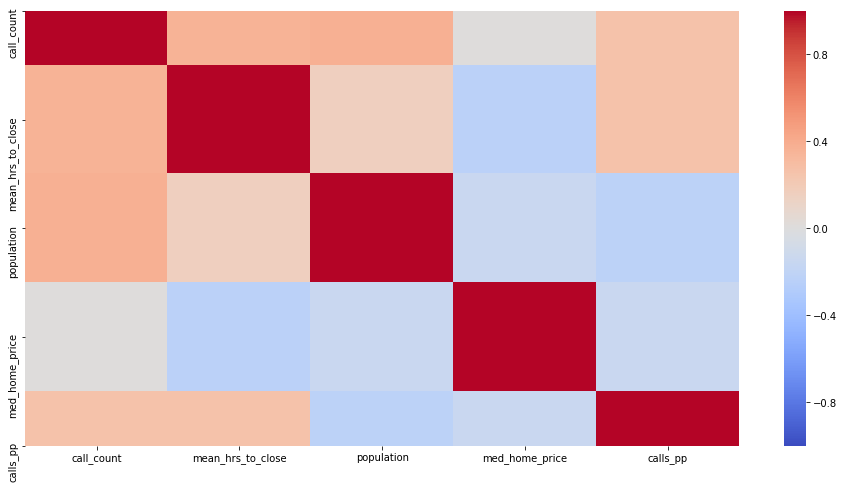

In [0]:
%matplotlib inline

plt.figure(figsize=(16, 8))
sns.heatmap(zip_df.corr(), center=0, vmin=-1, vmax=1, cmap='coolwarm');

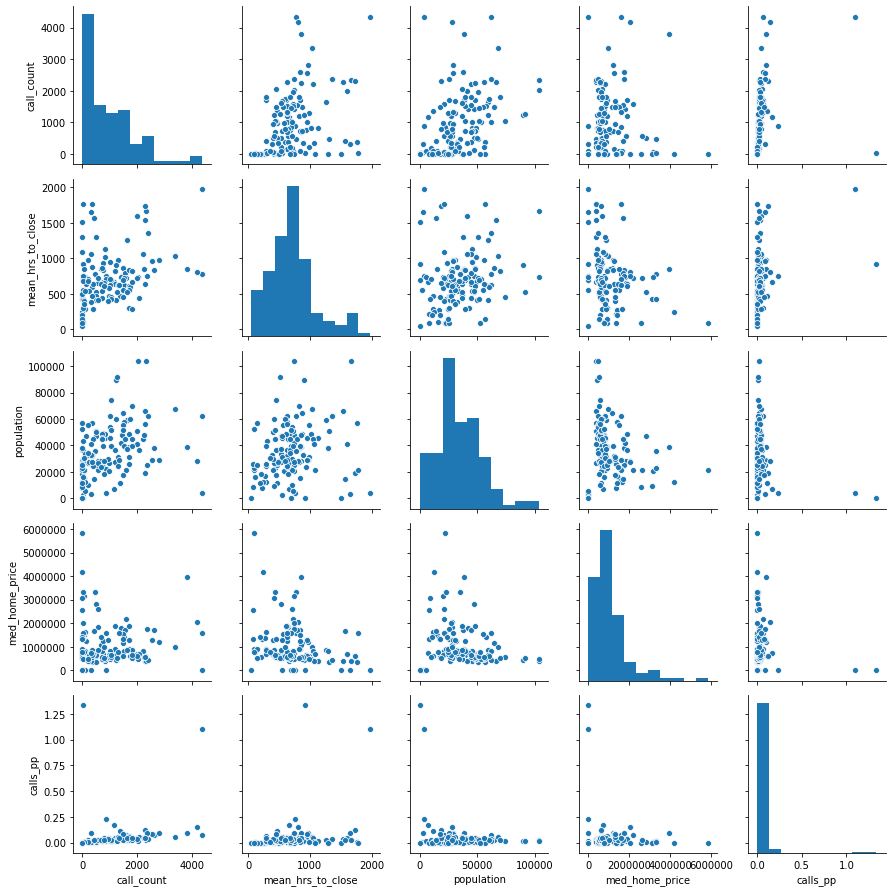

In [0]:
sns.pairplot(zip_df)
plt.tight_layout() # magic to make layout readable

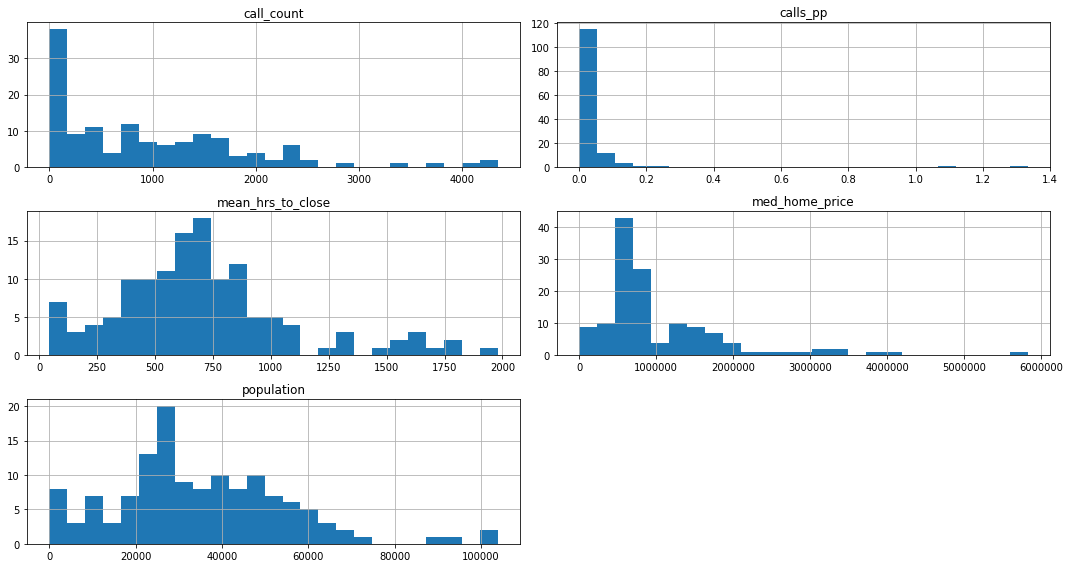

In [0]:
# box cox scipy transformation (or power transform on sk-learn) use on hourstoclose
zip_df.hist(bins=25, figsize=(15,8));
plt.tight_layout() # magic to make layout readable

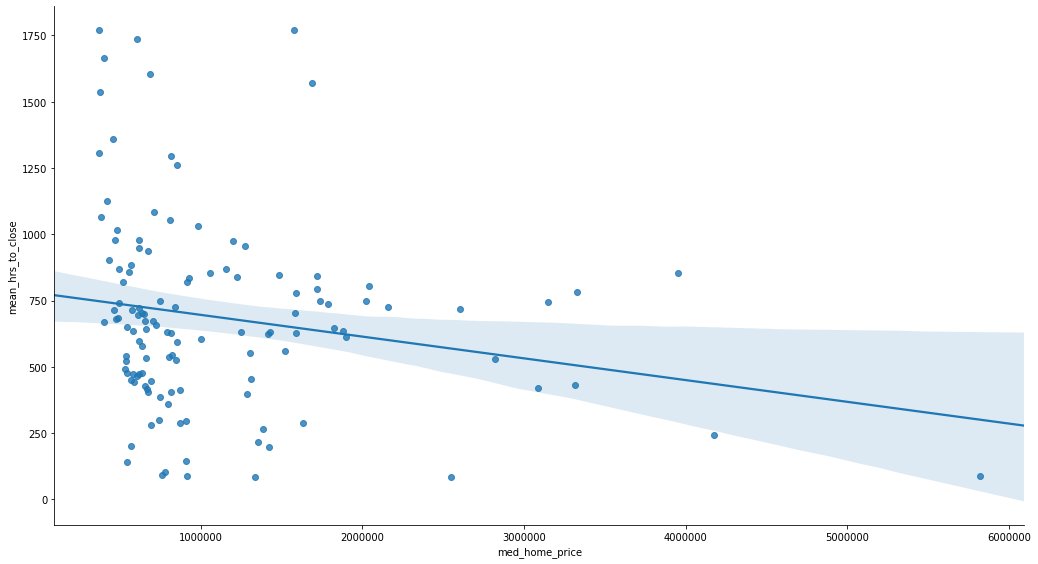

In [0]:
sns.pairplot(zip_df.dropna(), x_vars='med_home_price', y_vars='mean_hrs_to_close', kind='reg', height=8, aspect=1.8);

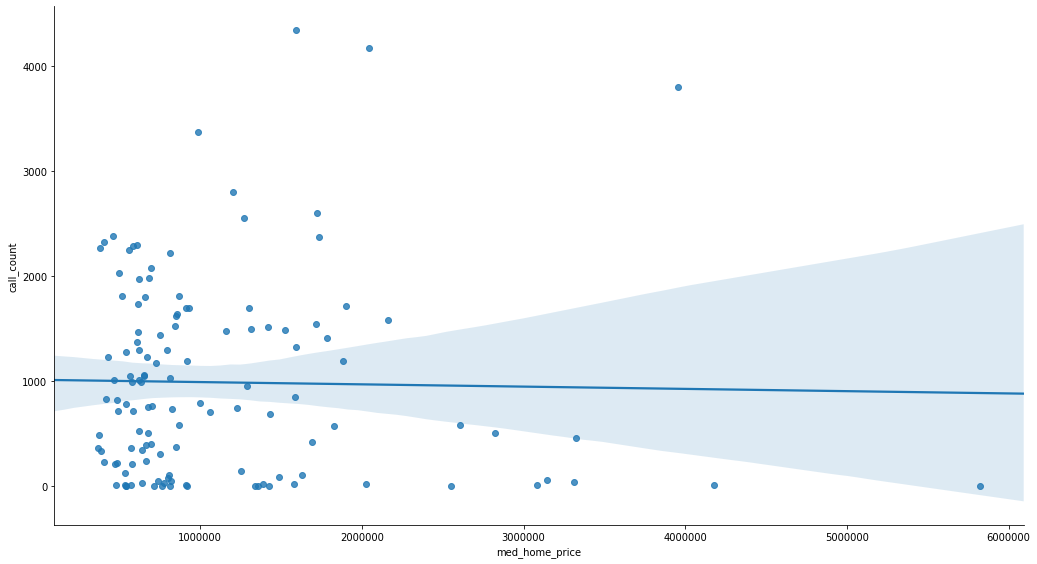

In [0]:
sns.pairplot(zip_df.dropna(), x_vars='med_home_price', y_vars='call_count', kind='reg', height=8, aspect=1.8);

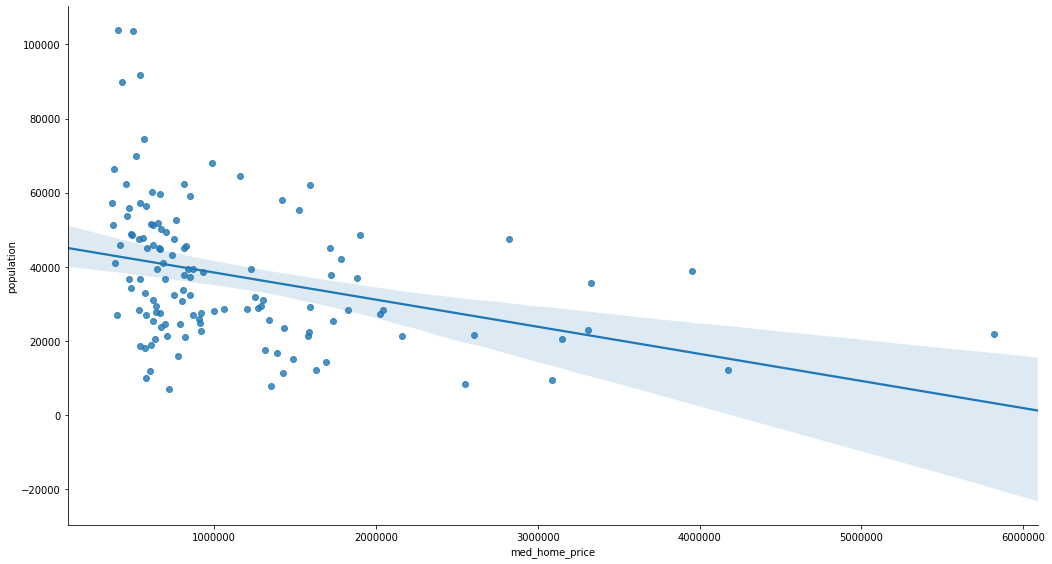

In [0]:
sns.pairplot(zip_df.dropna(), x_vars='med_home_price', y_vars='population', kind='reg', height=8, aspect=1.8);

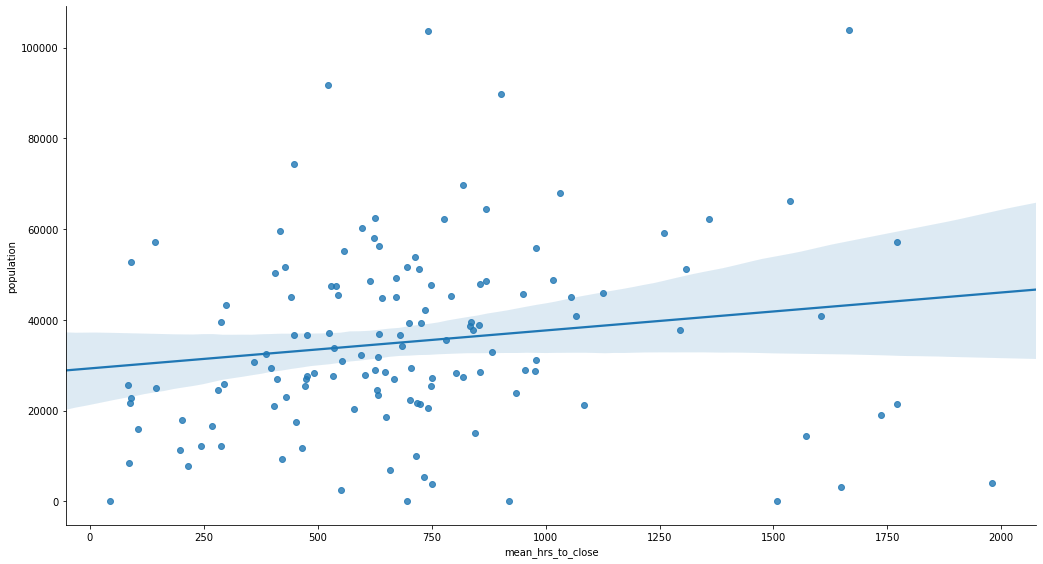

In [0]:
sns.pairplot(zip_df, x_vars='mean_hrs_to_close', y_vars='population', kind='reg', height=8, aspect=1.8);

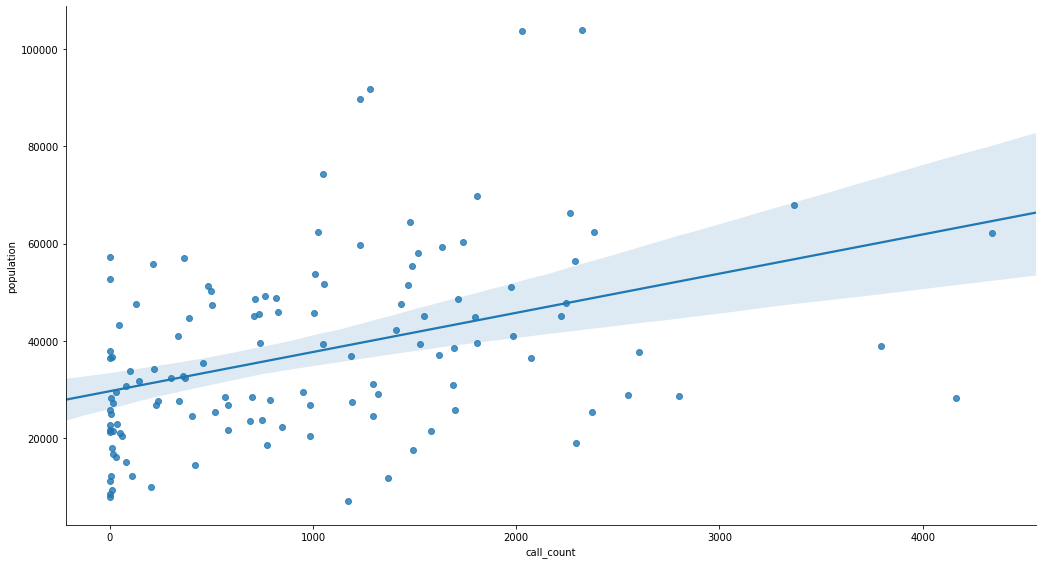

In [0]:
sns.pairplot(zip_df.dropna(), x_vars='call_count', y_vars='population', kind='reg', height=8, aspect=1.8);

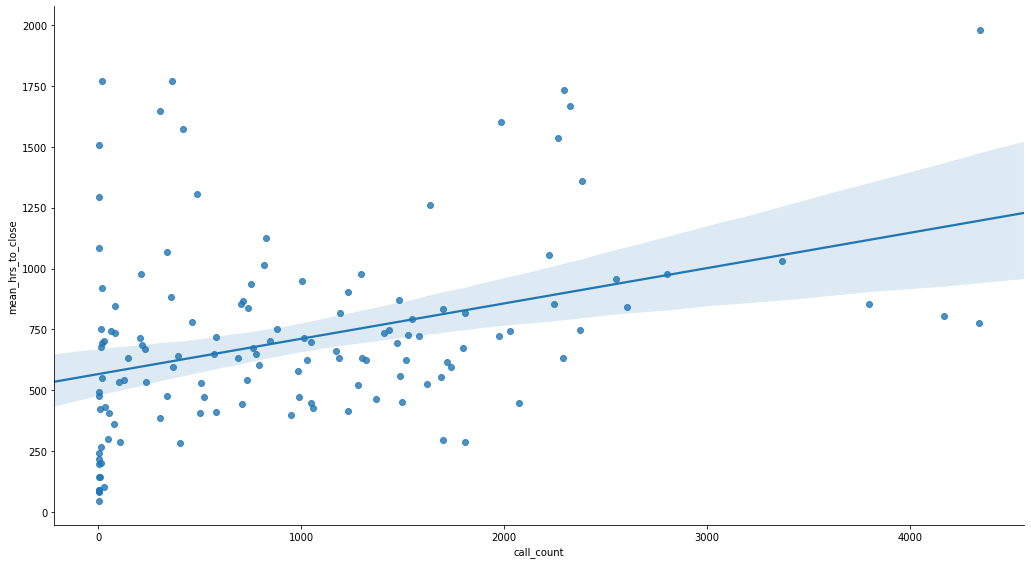

In [0]:
sns.pairplot(zip_df, x_vars='call_count', y_vars='mean_hrs_to_close', kind='reg', height=8, aspect=1.8);

## Look at outliers

In [0]:
zip_df[zip_df.call_count > 3000]

,call_count,mean_hrs_to_close,population,med_home_price,zip_name,calls_pp
zipcode,,,,,,
90004.0,4342,777.306583,62180.0,1590400.0,"Los Angeles(Hancock Park, Rampart Village, Vir...",0.069830
90020.0,3796,853.354368,38967.0,3954900.0,"Los Angeles(Hancock Park, Western Wilton, Wils...",0.097416
90021.0,4344,1979.827729,3951.0,0.0,NaN,1.099468
90026.0,3367,1031.165544,67869.0,984800.0,"Los Angeles(Echo Park, Silver Lake)",0.049610
90291.0,4166,804.206850,28341.0,2045100.0,Los Angeles(Venice),0.146996


In [0]:
zip_df[zip_df.calls_pp > 1]

,call_count,mean_hrs_to_close,population,med_home_price,zip_name,calls_pp
zipcode,,,,,,
90021.0,4344,1979.827729,3951.0,0.0,NaN,1.099468
90071.0,20,919.449111,15.0,0.0,NaN,1.333333


In [0]:
zip_df[zip_df.mean_hrs_to_close > 1750]

,call_count,mean_hrs_to_close,population,med_home_price,zip_name,calls_pp
zipcode,,,,,,
90001.0,365,1770.378365,57110.0,369300.0,"Los Angeles(South Los Angeles),Florence-Graham",0.006391
90021.0,4344,1979.827729,3951.0,0.0,NaN,1.099468
90404.0,17,1770.721493,21360.0,1578800.0,Santa Monica,0.000796


In [0]:
zip_df.sort_values('zip_name').tail(10)

,call_count,mean_hrs_to_close,population,med_home_price,zip_name,calls_pp
zipcode,,,,,,
90502.0,11,202.589798,18010.0,571600.0,"Torrance,West Carson",0.000611
90010.0,879,750.611824,3800.0,0.0,NaN,0.231316
90021.0,4344,1979.827729,3951.0,0.0,NaN,1.099468
90058.0,305,1648.376219,3223.0,0.0,NaN,0.094632
90067.0,17,551.611667,2424.0,0.0,NaN,0.007013
90071.0,20,919.449111,15.0,0.0,NaN,1.333333
90073.0,18,695.449426,0.0,0.0,NaN,0.000000
90094.0,84,733.195994,5464.0,0.0,NaN,0.015373
90095.0,1,1507.639444,0.0,0.0,NaN,0.000000


In [0]:
df[df.zipcode == 90120.0]
df.zipcode.max()

91801.0

In [0]:
# use a different algorithm? log normalize
# maybe merge in the number of incidents and use that as a weighting system?
# population density per zipcode

## Conclusions

It appears that there is a 20% correlation between the wealth of an area and the speed with which complaints to 311 about homeless encampments get addressed.

# Time Series Modeling

Next we will do some time series analysis on the data. The goal is to predict the number of reported homeless encampments.

In [0]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()  #pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.stattools.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

## Weekly Sampled Time Series

In [0]:
time_df = df.set_index('createddate')
hec_weekly_count = time_df['srnumber'].resample('W').count()
hec_weekly_count.rename('call_count', inplace=True)
hec_weekly_count

createddate
2016-01-03       8
2016-01-10     112
2016-01-17     102
2016-01-24     119
2016-01-31     110
              ... 
2019-10-20    1080
2019-10-27    1144
2019-11-03     981
2019-11-10    1073
2019-11-17     945
Freq: W-SUN, Name: call_count, Length: 203, dtype: int64

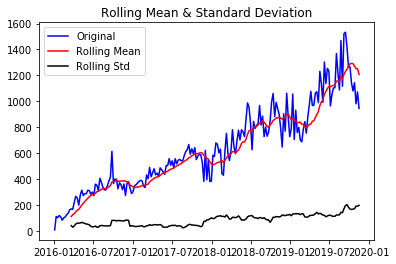

Results of Dickey-Fuller Test:
Test Statistic                  -0.942564
p-value                          0.773633
#Lags Used                      10.000000
Number of Observations Used    192.000000
Critical Value (1%)             -3.464875
Critical Value (5%)             -2.876714
Critical Value (10%)            -2.574859
dtype: float64


In [0]:
# null hypothesis: NOT STATIONARY
# test stat is greater critical value = STATIONARY
test_stationarity(hec_weekly_count)

<Figure size 1296x576 with 0 Axes>

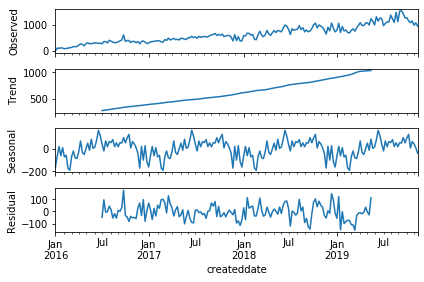

In [0]:
# may need to reregister matplotlib converters
pd.plotting.register_matplotlib_converters()

plt.figure(figsize=(18, 8))

sm.tsa.seasonal_decompose(hec_weekly_count).plot()
result = sm.tsa.stattools.adfuller(hec_weekly_count)

plt.show();

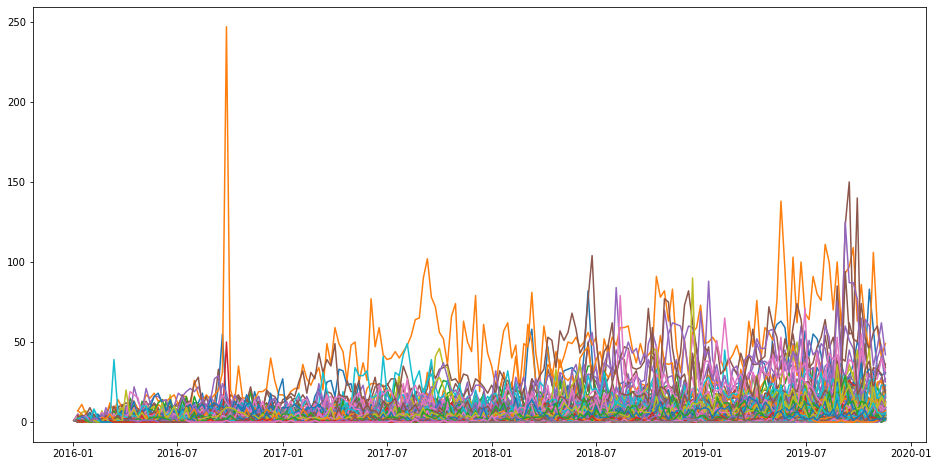

In [0]:
plt.figure(figsize=(16, 8))

for nc_id in time_df.nc.unique():
  nc_hec_weekly_count = time_df[time_df.nc == nc_id].srnumber.resample('W').count()
  nc_hec_weekly_count.rename('call_count', inplace=True)
  plt.plot(nc_hec_weekly_count);

plt.show()

In [0]:
plt.figure(figsize=(16, 8))

for nc_id in time_df.nc.unique():
  nc_hec_weekly_count = time_df[time_df.nc == nc_id].srnumber.resample('W').count()
  nc_hec_weekly_count.rename('call_count', inplace=True)
  #print(nc_hec_weekly_count)
  sm.tsa.seasonal_decompose(nc_hec_weekly_count).plot()
  #plt.plot(nc_hec_weekly_count);

plt.show()

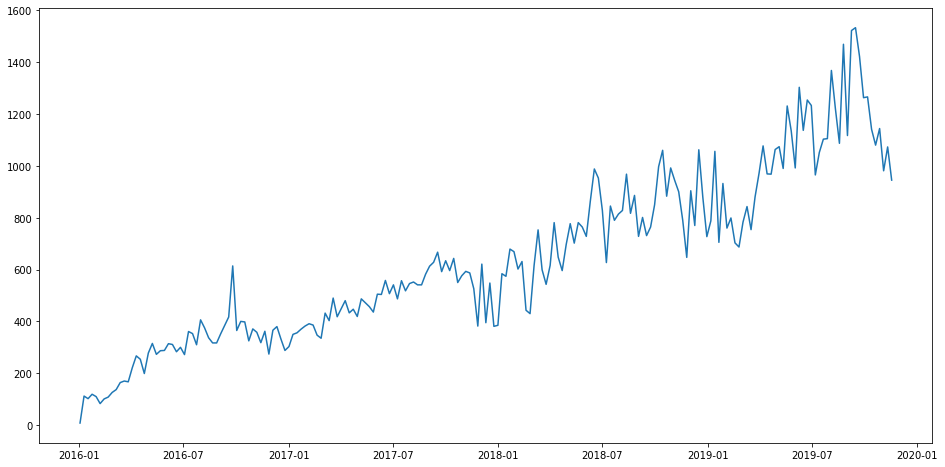

In [0]:
plt.figure(figsize=(16, 8))
plt.plot(hec_weekly_count);
plt.show()

In [0]:
hec_weekly_count[:'2016-02-07']

createddate
2016-01-03      8
2016-01-10    112
2016-01-17    102
2016-01-24    119
2016-01-31    110
2016-02-07     83
Freq: W-SUN, Name: call_count, dtype: int64

In [0]:
X = np.array(hec_weekly_count.index).reshape(1, -1)
y = hec_weekly_count.values.reshape(1, -1)
y

array([[   8,  112,  102,  119,  110,   83,  101,  108,  126,  137,  164,
         170,  167,  221,  267,  254,  199,  278,  315,  273,  287,  288,
         314,  311,  283,  300,  272,  361,  353,  310,  406,  375,  337,
         317,  317,  352,  385,  417,  614,  365,  400,  398,  325,  371,
         358,  318,  362,  274,  366,  380,  332,  288,  303,  350,  356,
         370,  382,  391,  386,  347,  335,  432,  403,  490,  418,  449,
         480,  433,  447,  419,  487,  472,  457,  436,  505,  504,  558,
         507,  541,  487,  557,  518,  546,  552,  541,  541,  582,  613,
         628,  667,  592,  634,  596,  643,  550,  576,  593,  587,  526,
         382,  621,  395,  548,  381,  385,  584,  574,  679,  669,  602,
         631,  443,  430,  615,  753,  599,  543,  616,  781,  648,  596,
         697,  777,  702,  781,  764,  728,  864,  988,  953,  828,  627,
         845,  790,  814,  828,  968,  817,  886,  728,  801,  731,  764,
         850,  997, 1060,  883,  992, 

In [0]:
# WHAT IS HAPPENING????
linreg = LinearRegression()
linreg.fit(X, y)#
linreg.predict(['2016-02-07'])
#linreg.score(X.astype('float64'), y.astype('float64'))

ValueError: ignored

In [0]:
hec_weekly_count.reset_index()

X = df.createddate
y = df.srnumber.count()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

TypeError: ignored

In [0]:
print(type(hec_weekly_count.index))
print(type(hec_weekly_count.values))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'numpy.ndarray'>


In [0]:
X = df.createddate
Y = df.srnumber.count()
X

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ValueError: ignored

ValueError: ignored

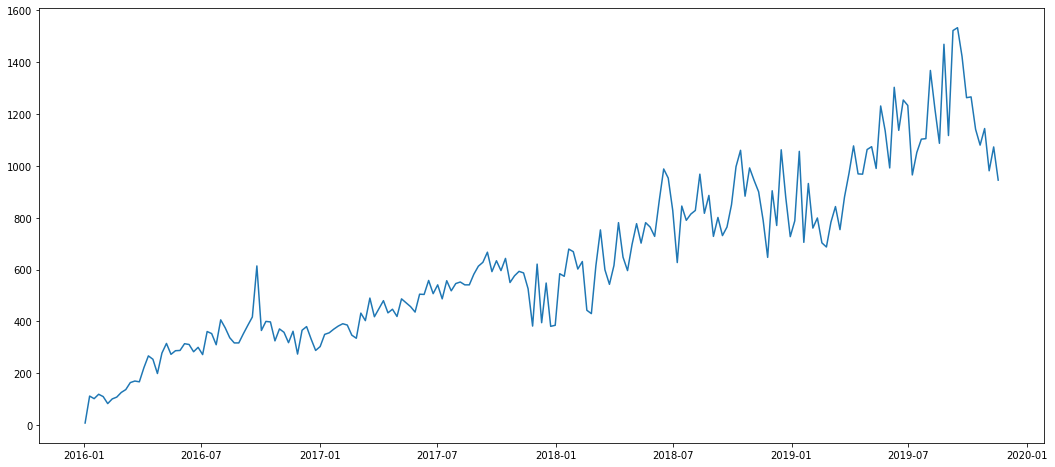

In [0]:
plt.figure(figsize=(18, 8))
plt.plot(hec_weekly_count);
plt.plot(X, y, color='red');
plt.show()

In [0]:

coefs = np.polyfit(hec_weekly_count.index.astype('datetime64'), hec_weekly_count.values, 1)
coefs
#lineFunction = np.poly1d(coefs)
#plt.plot(drones.index, drones.drone_racing_interest, drones.index, lineFunction(drones.index))

TypeError: ignored

## FB Prophet on Weekly Events

In [0]:
weekly_events = hec_weekly_count.to_frame()
weekly_events.columns = ['Count']
weekly_events.rename_axis('Date', inplace = True)
wk_train = weekly_events['2016': '2018']
wk_test = weekly_events['2019']
wk_train.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2018-10-28', '2018-11-04', '2018-11-11', '2018-11-18',
               '2018-11-25', '2018-12-02', '2018-12-09', '2018-12-16',
               '2018-12-23', '2018-12-30'],
              dtype='datetime64[ns]', name='Date', length=157, freq='W-SUN')

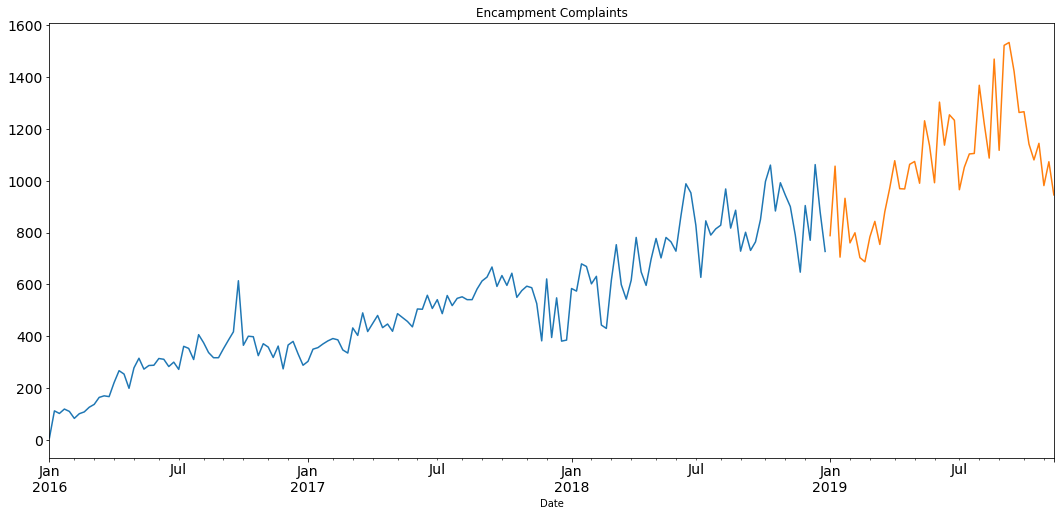

In [0]:
# need to reregister converters since Prophet kills them
pd.plotting.register_matplotlib_converters()
# WHAT IS HAPPENING? https://darektidwell.com/typeerror-float-argument-must-be-a-string-or-a-number-not-period-facebook-prophet-and-pandas/

wk_train.Count.plot(figsize=(18, 8), title= 'Encampment Complaints', fontsize=14)
wk_test.Count.plot(figsize=(18, 8), title= 'Encampment Complaints', fontsize=14)
plt.show();

In [0]:
wk_train.reset_index(inplace=True)
wk_train.columns = ['ds', 'y']
m = Prophet(weekly_seasonality=True)
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=52, freq='W')
future

,ds
0,2016-01-03
1,2016-01-10
2,2016-01-17
3,2016-01-24
4,2016-01-31
...,...
204,2019-12-01
205,2019-12-08
206,2019-12-15
207,2019-12-22


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-03,29.718872,-50.208680,114.166354
1,2016-01-10,67.952804,-16.503217,150.518437
2,2016-01-17,142.385181,59.430015,222.152924
3,2016-01-24,188.737749,109.595251,274.209300
4,2016-01-31,170.886645,86.731363,249.777962
...,...,...,...,...
204,2019-12-01,1077.826688,996.816044,1161.285217
205,2019-12-08,1119.510005,1033.212743,1203.089912
206,2019-12-15,1138.932997,1059.713645,1222.783993
207,2019-12-22,1109.641539,1028.285292,1191.685986


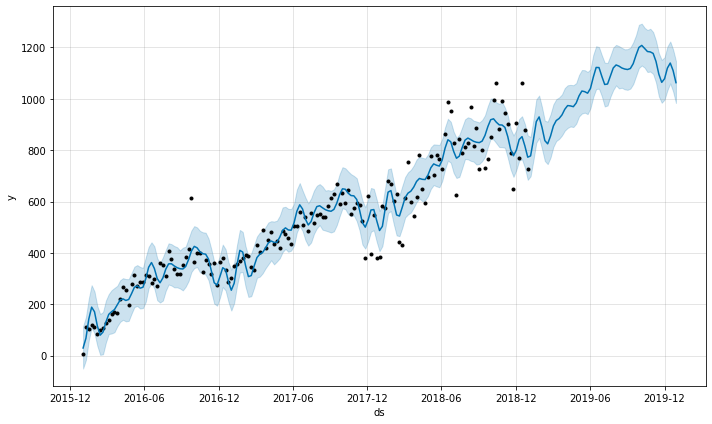

In [0]:
fig1 = m.plot(forecast)

In [0]:
# probably need to smooth this out somehow...
# plot versus actual? merge with actual data set (y_hat)
# root mean square comparison (see how off it is)
# rerun with all data for production version

In [0]:
weekly_events = pd.merge(weekly_events, forecast[['ds', 'yhat']], left_on='Date', right_on='ds')

In [0]:
weekly_events.set_index('ds', inplace=True)

In [0]:
weekly_events['2019':]

,Count,yhat
ds,,
2019-01-06,788,777.496243
2019-01-13,1056,840.619913
2019-01-20,705,910.981636
2019-01-27,932,929.363028
2019-02-03,760,888.678615
2019-02-10,799,837.073689
2019-02-17,703,824.442873
2019-02-24,687,854.864823
2019-03-03,783,894.239563


In [0]:
np.sqrt(metrics.mean_squared_error(weekly_events.Count, weekly_events.yhat))

90.97732750844753

In [0]:
np.sqrt(metrics.mean_squared_error(weekly_events['2019':].Count, weekly_events['2019':].yhat))

150.1844224255909

## FB Prophet on Daily Events

In [21]:
daily_events = (pd.to_datetime(df['createddate'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('Date')
       .reset_index(name='Count'))

daily_events.sort_values(by='Date', inplace=True)
daily_events.reset_index(inplace = True)
daily_events['Date'] = pd.to_datetime(daily_events['Date'])
daily_events.set_index('Date', inplace = True)
daily_events.drop(columns='index', inplace=True)
daily_events

,Count
Date,
2016-01-01,1
2016-01-02,2
2016-01-03,5
2016-01-04,20
2016-01-05,14
...,...
2019-11-11,206
2019-11-12,219
2019-11-13,176


In [0]:
train = daily_events['2016':'2018']
test = daily_events['2019':]

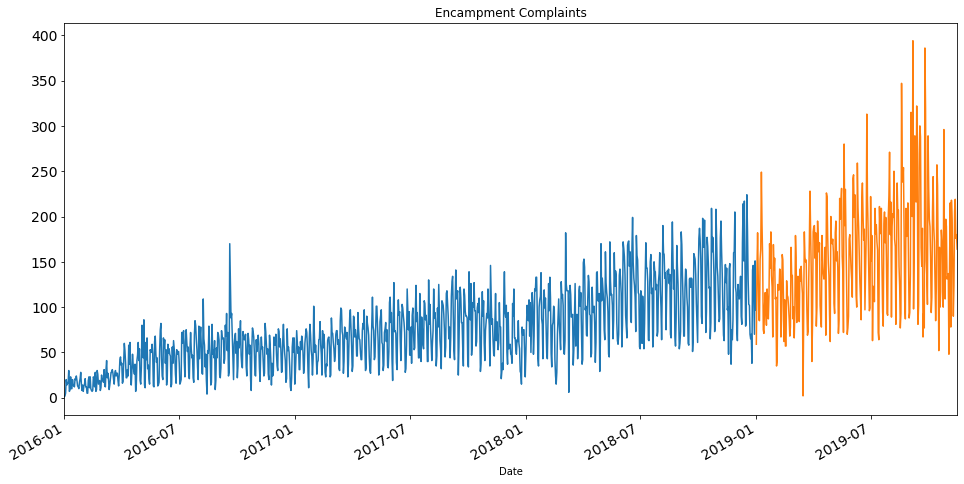

In [23]:
train.Count.plot(figsize=(16, 8), title= 'Encampment Complaints', fontsize=14)
test.Count.plot(figsize=(16, 8), title= 'Encampment Complaints', fontsize=14)
plt.show();

In [24]:
train.reset_index(inplace=True)
train.columns = ['ds', 'y']
#tried pulling out outlier but this didn't help
#train.loc[(train['ds'] == '2016-09-19'), 'y'] = None
m = Prophet(daily_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [25]:
future = m.make_future_dataframe(periods=356, freq='D')
future

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1446,2019-12-18
1447,2019-12-19
1448,2019-12-20
1449,2019-12-21


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,-3.295600,-27.989412,21.238703
1,2016-01-02,-22.710099,-44.516356,1.411468
2,2016-01-03,-20.647871,-45.601543,3.219318
3,2016-01-04,31.592639,6.478873,55.654276
4,2016-01-05,34.162964,11.060161,57.302297
...,...,...,...,...
1446,2019-12-18,179.013342,154.576007,203.925687
1447,2019-12-19,172.353188,146.946902,195.450658
1448,2019-12-20,160.840011,136.658890,185.195856
1449,2019-12-21,128.451255,103.690311,153.320624


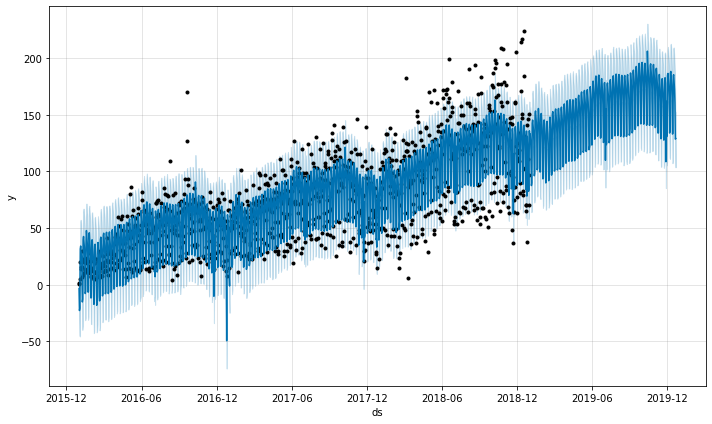

In [27]:
fig2 = m.plot(forecast)

In [0]:
daily_forecasts = pd.merge(daily_events, forecast[['ds', 'yhat']], left_on='Date', right_on='ds')

In [0]:
daily_forecasts.set_index('ds', inplace=True)

In [30]:
daily_forecasts['2019':]

,Count,yhat
ds,,
2019-01-01,59,126.301163
2019-01-02,142,133.068950
2019-01-03,182,127.971741
2019-01-04,137,118.135135
2019-01-05,86,87.500552
...,...,...
2019-11-11,206,174.128921
2019-11-12,219,185.484628
2019-11-13,176,179.148731


In [31]:
np.sqrt(metrics.mean_squared_error(daily_forecasts['2019':].Count, daily_forecasts['2019':].yhat))

46.59646518140569

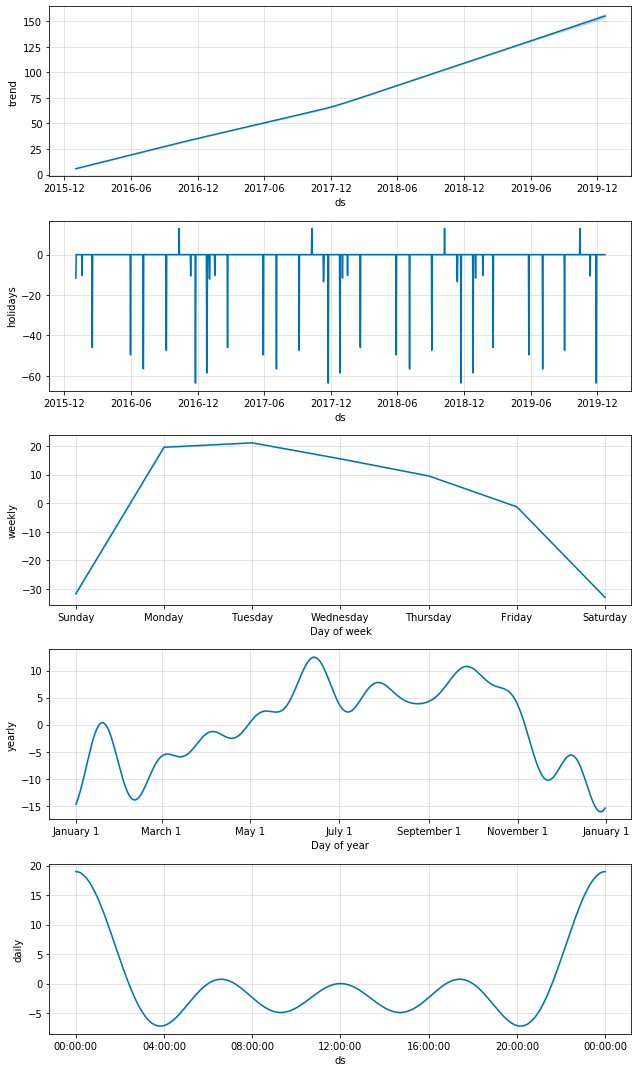

In [32]:
fig = m.plot_components(forecast)

In [43]:
print(m.

None


In [76]:
m.predict(pd.DataFrame({'ds': ['2019-12-02']}))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-02,156.31921,153.694862,224.495238,156.317908,156.319829,33.809386,33.809386,33.809386,19.046244,19.046244,19.046244,22.313266,22.313266,22.313266,-7.550124,-7.550124,-7.550124,0.0,0.0,0.0,190.128596


In [77]:
m.predict(pd.DataFrame({'ds': ['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05']}))[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-12-01,130.018521,94.562513,165.078557
1,2019-12-02,190.128596,154.707501,228.531041
2,2019-12-03,192.538169,155.968140,229.527838
3,2019-12-04,188.686909,151.870291,225.553153
4,2019-12-05,179.460917,143.460570,214.257404


In [0]:
# lower and upper seem to change with each run

In [74]:
df.zipcode.value_counts()

90021.0    4344
90004.0    4342
90291.0    4166
90020.0    3796
90026.0    3367
           ... 
90745.0       1
90301.0       1
90211.0       1
90095.0       1
91801.0       1
Name: zipcode, Length: 135, dtype: int64

In [73]:
# nc
df.apc.value_counts()

Central APC              41296
South Valley APC         25283
South Los Angeles APC    18153
North Valley APC         17159
West Los Angeles APC     13374
East Los Angeles APC     10579
Harbor APC                3254
                             4
Name: apc, dtype: int64

In [0]:
def create_src_df(timeseries):
    ret_df = (pd.to_datetime(timeseries['createddate'])
          .dt.floor('d')
          .value_counts()
          .rename_axis('Date')
          .reset_index(name='Count'))
    ret_df.sort_values(by='Date', inplace=True)
    ret_df.reset_index(inplace = True)
    ret_df['Date'] = pd.to_datetime(ret_df['Date'])
    ret_df.set_index('Date', inplace = True)
    ret_df.drop(columns='index', inplace=True)
    return ret_df

In [120]:
new_df = create_src_df(df[df['apc']== 'South Los Angeles APC'])
new_df

,Count
Date,
2016-01-02,1
2016-01-04,2
2016-01-05,2
2016-01-06,4
2016-01-07,1
...,...
2019-11-11,18
2019-11-12,31
2019-11-13,29


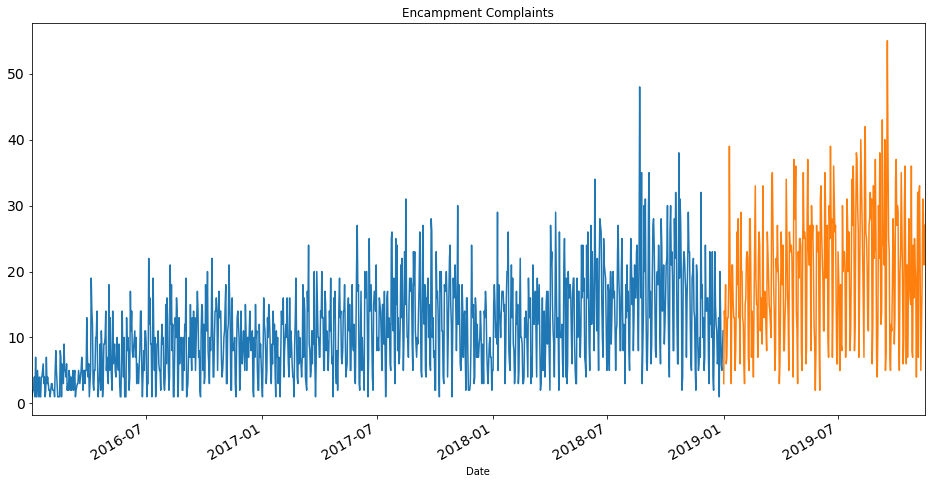

In [121]:
train = new_df['2016':'2018'] 
test = new_df['2019':] 
train.Count.plot(figsize=(16, 8), title='Encampment Complaints', fontsize=14) 
test.Count.plot(figsize=(16, 8), title='Encampment Complaints', fontsize=14) 
plt.show();

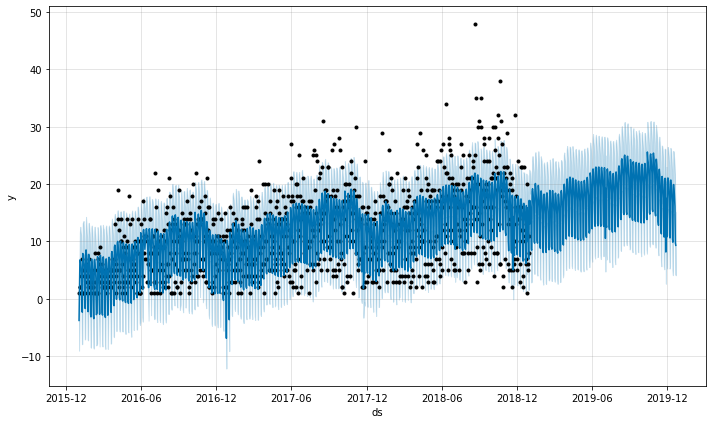

In [122]:
train.reset_index(inplace=True)
train.columns = ['ds', 'y']
m = Prophet(daily_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(train)
future = m.make_future_dataframe(periods=356, freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

In [123]:
m.train_holiday_names


0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
dtype: object

In [110]:
daily_forecasts['2019':]

,Count,yhat
ds,,
2019-01-01,12,24.980785
2019-01-02,34,24.993162
2019-01-03,55,24.560322
2019-01-04,31,23.676875
2019-01-05,19,19.980752
...,...,...
2019-11-11,65,32.817646
2019-11-12,34,34.783788
2019-11-13,25,34.318379


In [111]:
daily_forecasts = pd.merge(new_df, forecast[['ds', 'yhat']], left_on='Date', right_on='ds')
daily_forecasts.set_index('ds', inplace=True)
np.sqrt(metrics.mean_squared_error(daily_forecasts['2019':].Count, daily_forecasts['2019':].yhat))

7.29797723546886

In [118]:
for apc in df.apc.unique():
    print(apc)
    new_df = create_src_df(df[df['apc'] == apc])
    new_df.reset_index(inplace=True)
    new_df.columns = ['ds', 'y']
    m = Prophet(daily_seasonality=True)
    m.add_country_holidays(country_name='US')
    m.fit(new_df)
    future = m.make_future_dataframe(periods=356, freq='D')
    forecast = m.predict(future)
    print(new_df)
    daily_forecasts = pd.merge(new_df, forecast[['ds', 'yhat']], left_on='ds', right_on='ds')
    daily_forecasts.set_index('ds', inplace=True)
    daily_forecasts
    print(daily_forecasts)
    error = np.sqrt(metrics.mean_squared_error(daily_forecasts['2019':].Count, daily_forecasts['2019':].yhat))
    print(error)


North Valley APC
             ds   y
0    2016-01-01   1
1    2016-01-04   4
2    2016-01-05   3
3    2016-01-06   2
4    2016-01-07   3
...         ...  ..
1394 2019-11-11  39
1395 2019-11-12  26
1396 2019-11-13  23
1397 2019-11-14  28
1398 2019-11-15  20

[1399 rows x 2 columns]
             y       yhat
ds                       
2016-01-01   1  -3.731499
2016-01-04   4   5.357601
2016-01-05   3   6.064266
2016-01-06   2   4.517532
2016-01-07   3   4.152119
...         ..        ...
2019-11-11  39  25.781923
2019-11-12  26  24.206983
2019-11-13  23  22.459603
2019-11-14  28  21.879646
2019-11-15  20  20.207262

[1399 rows x 2 columns]


AttributeError: ignored

## Production export

Fit a model with all the available data and export a pickle for later use

In [0]:
daily_events.reset_index(inplace=True)
daily_events.columns = ['ds', 'y']

In [37]:
m = Prophet(daily_seasonality=True)
m.fit(daily_events)

In [38]:
predict_date = ['2019-12-02']
predicted_value = m.predict(pd.DataFrame({'ds': predict_date})).yhat
predicted_value.values[0]

190.12859607929255

In [0]:
import pickle
from google.colab import drive

data_dir = 'drive/My Drive/Colab Notebooks/GA/data/'
filename = 'encampment_call_model.pkl'

drive.mount('/content/drive/')
pickle.dump(m, open(data_dir + filename, 'wb'))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# KNN Regression Modeling

In [11]:
df

,index,srnumber,createddate,updateddate,status,assignto,actiontaken,servicedate,closeddate,zipcode,latitude,longitude,nc,ncname,statusf,assigntof,is_closed,hourstoclose
0,251,1-88277111,2016-01-01 11:59:22,2016-01-05 07:31:46,Closed,"219, IED",SR Created,2016-01-05 07:31:00,2016-01-05 07:31:46,91345.0,34.264524,-118.471658,101.0,MISSION HILLS NC,0,0,1,91.540000
1,250,1-88412861,2016-01-02 10:01:50,2016-01-27 07:48:23,Closed,"107, IED",SR Created,NaT,2016-01-27 07:48:23,90027.0,34.101218,-118.291811,36.0,LOS FELIZ NC,0,1,1,597.775833
2,249,1-88498251,2016-01-02 13:29:53,2016-03-29 09:53:12,Closed,"102, IED",SR Created,2016-03-29 09:52:00,2016-03-29 09:53:12,90003.0,33.952787,-118.279836,87.0,EMPOWERMENT CONGRESS SOUTHEAST AREA NDC,0,2,1,2084.388611
3,248,1-88594161,2016-01-03 08:56:57,2016-03-30 16:57:14,Closed,"104, IED",SR Created,2016-03-30 16:56:00,2016-03-30 16:57:14,90057.0,34.066573,-118.270664,97.0,WESTLAKE NORTH NC,0,3,1,2096.004722
4,247,1-88628731,2016-01-03 11:03:11,2016-01-04 18:49:15,Closed,"109, IED",SR Created,2016-01-04 18:48:00,2016-01-04 18:49:15,90006.0,34.048300,-118.292824,76.0,PICO UNION NC,0,4,1,31.767778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129137,80299,1-1494228858,2019-11-15 21:35:48,2019-11-15 21:35:49,Open,WV,SR Created,2019-11-21 00:00:00,NaT,91356.0,34.172118,-118.535251,17.0,TARZANA NC,4,29,0,NaN
129138,80298,1-1494229353,2019-11-15 21:48:37,2019-11-15 21:48:38,Open,EV,SR Created,2019-11-19 00:00:00,NaT,91601.0,34.176056,-118.381645,24.0,NOHO NC,4,28,0,NaN
129139,80295,1-1494236516,2019-11-15 21:59:24,2019-11-15 21:59:26,Open,NC,SR Created,2019-11-22 00:00:00,NaT,90028.0,34.102626,-118.318234,30.0,HOLLYWOOD UNITED NC,4,7,0,NaN
129140,80297,1-1494232291,2019-11-15 22:07:21,2019-11-15 22:07:21,Open,WLA,SR Created,2019-11-18 00:00:00,NaT,90291.0,33.984691,-118.469307,68.0,VENICE NC,4,18,0,NaN


In [12]:
df.isnull().sum()

index              0
srnumber           0
createddate        0
updateddate        0
status             0
assignto         621
actiontaken        0
servicedate      686
closeddate      7741
zipcode           89
latitude          43
longitude         43
nc              1236
ncname           962
statusf            0
assigntof          0
is_closed          0
hourstoclose    7741
dtype: int64